In [ ]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [ ]:
np.set_printoptions(precision=4,suppress=True)
%matplotlib inline
rcParams['figure.figsize'] = 7,4
plt.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# df1 = pd.read_csv('/content/drive/My Drive/N.csv')
# df2 = pd.read_csv('/content/drive/My Drive/F.csv')
# df2 = df2.sample(4000)
# df = df1.append(df2,ignore_index= True)
df = pd.read_csv('/content/drive/My Drive/cutting.csv')

In [ ]:
df.shape

(12288, 8)

In [ ]:
x = df.loc[:, df.columns != 'class'].values  # converts the df to a numpy array

y = df['class'].values

X = preprocessing.scale(x)

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state =  0, stratify =y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9216, 7), (3072, 7), (9216,), (3072,))

In [ ]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
print(clf)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
y_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1536
           1       0.99      0.99      0.99      1536

    accuracy                           0.99      3072
   macro avg       0.99      0.99      0.99      3072
weighted avg       0.99      0.99      0.99      3072



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.990234375

In [ ]:
from mlxtend. plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import mlxtend                                                          
print(mlxtend.__version__)   

0.17.3


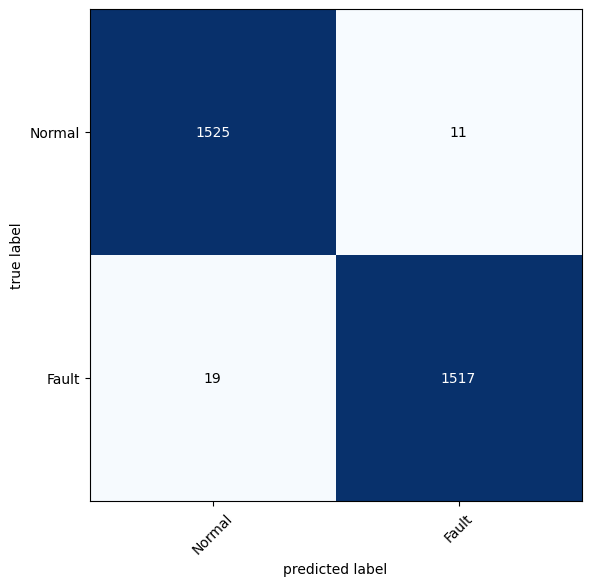

In [ ]:
class_names = ['Normal','Fault']
mat = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mat, figsize=(6,6), class_names = class_names, show_normed = False)
plt.tight_layout()
plt.show()
fig.savefig('cm.png')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

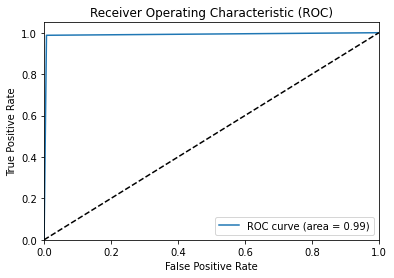

In [ ]:
plot_roc(y_pred,y_test)